In [1]:
from scipy import special as sp
import numpy as np
import matplotlib.pyplot as plt

from ipynb.fs.full.mie_functions_1 import *

In [2]:
# Import refractive index values
ref_lam_silver, ref_n_silver, ref_k_silver = import_data("McPeak_silver.csv")
m_silver = ref_n_silver + 1j * ref_k_silver # SIGN!!!!!!!!
ref_lam_gold, ref_n_gold, ref_k_gold = import_data("McPeak_gold.csv")
m_gold = ref_n_gold + 1j * ref_k_gold # SIGN!!!!!!!!

In [3]:
# Define constants
hbar = 1.054571817e-34 # [Js]   1 [au]
d_eg = 8.4783536198e-30
c = 299792458 # [m/s] / (2.187691 * (10**6)) [au]
dperm = 0.5*d_eg
r = 0.01 #micrometers

In [4]:
def rabi_frequency(x_points, y, z, refr_ind, lam_list, r, n = 1, lam_value = 0.36):
    # Rescale coordinates to meters
    x_vals = x_points*1.0e-9 # nm --> m
    y_val = y*1.0e-9 # nm --> m
    z_val = z*1.0e-9 # nm --> m
    # Find refractive index at wavelength LAM_VALUE
    index = np.where(lam_list == lam_value)
    m_value = refr_ind[index]  
    #Rescale input parameters to meters
    lam_vals = lam_list * 1e-6 # micrometers --> m
    lam_val = lam_value * 1e-6 # micrometers --> m
    rad = r * 1e-6 # micrometers --> m
    # Build arrays of points and scattered fields
    E = np.zeros_like(x_vals)
    ind = 0
    for i in x_vals:
        if i**2 + y_val**2 < rad**2:
             E[ind] = 0
        else:
            E[ind] += scattered_field_absolute(y_val, i, z_val, refr_ind, lam_vals, rad, lam_val, n = 1)[0] # in V/m
        ind += 1
    #print('E-field', E)
    w = 2*np.pi*c/lam_val
    omega_np = E*d_eg/hbar
    kappa = E*dperm/(hbar * w)
    #print('kappa', kappa)
    J_factor = 2*sp.jv(1,kappa)/kappa 
    omega = omega_np*J_factor #*sp.jv(0, kappa) # Multiply by 2?
    return J_factor, omega_np, omega

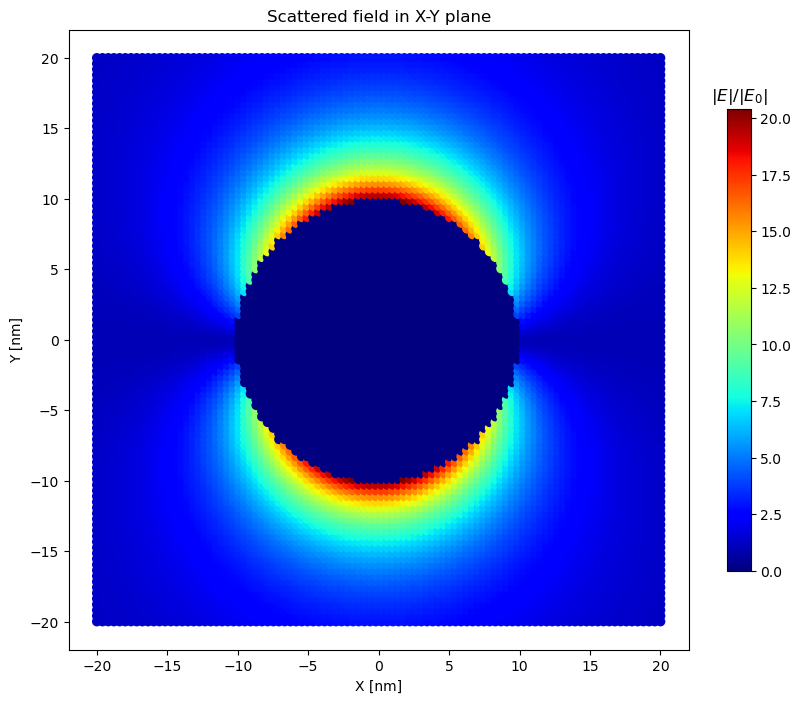

('At incoming wavelength of 360000000.0 nm',
 'Maximum scattered field = 20.422256542018502 E_0')

<Figure size 640x480 with 0 Axes>

In [36]:
#x_arr = np.linspace(-1.0,1.0,100) #nm
#y_arr = np.linspace(-11.0,-10.0,100)
x_arr = np.linspace(-20.0,20.0,100) #nm
y_arr = np.linspace(-20.0,20.0,100)
plot_scattered_field(y_arr, x_arr, 0.0, m_silver, ref_lam_silver, r, filename = 'defaultFile.txt', lam_value = 0.36, n = 1)

In [33]:
x_arr = np.linspace(0.0,90.0,100) #nm
y_arr = np.linspace(0.0,90.0,100)
J_factor, omega_np, omega = rabi_frequency(x_points = x_arr, y = 10.1, z = 0.0, refr_ind = m_silver, lam_list = ref_lam_silver, r = r, n = 1, lam_value = 0.36)

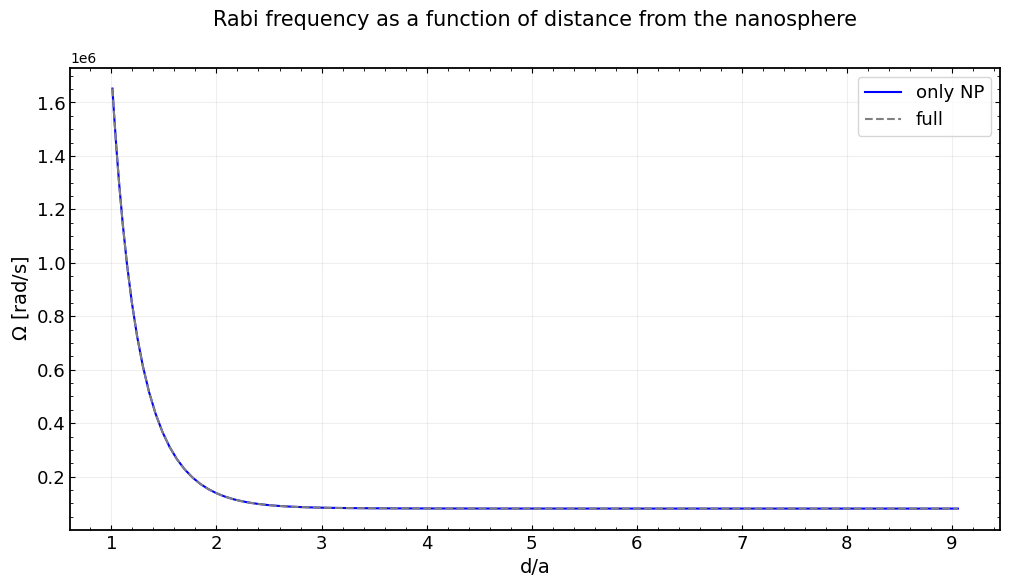

In [34]:
y_arr = np.ones_like(x_arr)*10.1
r_arr = np.sqrt(x_arr**2 + y_arr**2)
general_plot_style(x = [r_arr/(r*1e3), r_arr/(r*1e3)], y = [omega_np, omega], legendlabels = ['only NP', 'full'], colors = ['blue', 'grey'], \
                   ls = ['solid', '--'], ylims = None, xlabel = 'd/a', ylabel = '$\Omega$ [rad/s]', \
                   title = 'Rabi frequency as a function of distance from the nanosphere', figsize = [12,6])

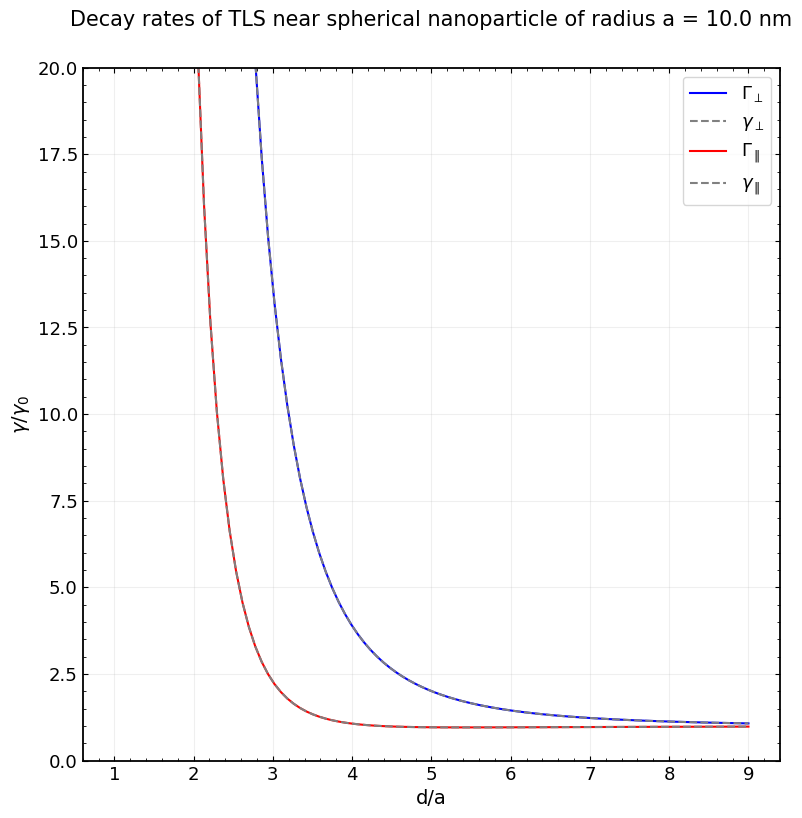

In [8]:
a = 10e-9  # radius of the sphere in meters (10 nm)
lam = 0.36  # emission wavelength in meters (360 nm)
index = np.where(ref_lam_silver == lam)
mval = m_silver[index][0]
dpoints = np.linspace(1.0, 9.0, 100) * a
A_list, B_list, gamma_norm, gamma_tang, gamma_norm_rad, gamm_tang_rad = gamma_factors(dpoints, mval, lam*1e-6, a, n = 1, order = 5, plot = False)

general_plot_style(x = [dpoints/a,dpoints/a,dpoints/a,dpoints/a], y = [J_factor*gamma_norm, gamma_norm, J_factor*gamma_tang, gamma_tang], \
                   legendlabels = ['$\Gamma_{\perp}$', '$\gamma_{\perp}$', '$\Gamma_{\, \|}$', '$\gamma_{\, \|}$'], \
                   colors = ['blue', 'grey', 'red', 'grey'], xlabel = 'd/a', ylabel = '$\gamma / \gamma_0$', \
                   ls = ['solid', '--', 'solid', '--'], ylims = [0, 20], \
                   title = f'Decay rates of TLS near spherical nanoparticle of radius a = {a*10**9} nm')